In [1]:
import math 
import numpy

# ΙΟΥΝΙΟΣ 2021

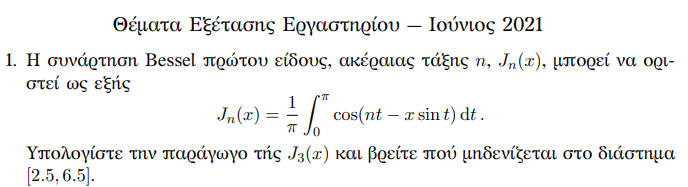

In [2]:
## Γενική συνάρτηση trapezoidal rule (όπως θα έγραφες εσύ)
def trapezoidal_rule(f, a, b, n):
    h = (b - a) / n 
    total = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        total += f(a + i * h)
    return total * h

# J3(x) με χρήση trapezoidal_rule
def J3(x):
    def integrand(t):
        return math.cos(3 * t - x * math.sin(t))
    return trapezoidal_rule(integrand, 0.0, math.pi, 200) / math.pi

def dJ3_dx(x, h=1e-5):
    return (J3(x + h) - J3(x - h)) / (2 * h)

def secant(x1, x2, tol, f):
    f1 = f(x1)
    f2 = f(x2)
    while abs(f2) > tol:
        x = x2 - f2 * (x2 - x1) / (f2 - f1)
        x1, f1 = x2, f2
        x2, f2 = x, f(x)
    return x2

root = secant(2.5, 6.5, 1e-8, dJ3_dx)
print("Το J3'(x) μηδενίζεται στο x =", root)

Το J3'(x) μηδενίζεται στο x = 4.201188944382491


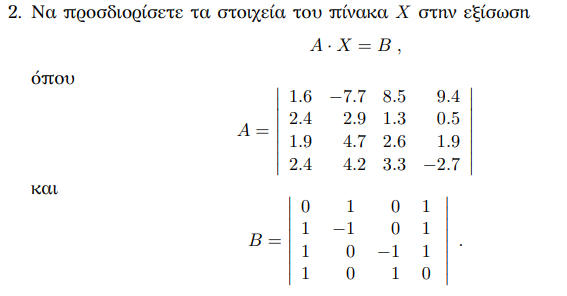

In [5]:
#ΜΕ GAUSS ME PIVOTING!
# Οι πίνακες της άσκησης
A = np.array([
    [1.6, -7.7, 8.5, 9.4],
    [2.4, 2.9, 1.3, 0.5],
    [1.9, 4.7, 2.6, 1.9],
    [2.4, 4.2, 3.3, -2.7]
], dtype=float)

B = np.array([
    [0, 1, 0, 1],
    [1, -1, 0, 1],
    [1, 0, -1, 1],
    [1, 0, 1, 0]
], dtype=float)

# Εδώ είναι οι δικές σου συναρτήσεις (copy-paste από το κελί σου)
def normalize_rows(a, b, k):
    n = len(b)
    for i in range(k, n):
        max_val = abs(b[i])
        for j in range(k, n):
            if abs(a[i, j]) > max_val:
                max_val = abs(a[i, j])
        for j in range(k, n):
            a[i, j] /= max_val
        b[i] /= max_val

def swap_rows(a, b, k, p):
    a[[k, p]] = a[[p, k]]
    b[k], b[p] = b[p], b[k]

def pivot(a, b, k):
    normalize_rows(a, b, k)
    n = len(b)
    best = k
    for i in range(k + 1, n):
        if abs(a[i, k]) > abs(a[best, k]):
            best = i
    if best != k:
        swap_rows(a, b, k, best)

def forward(a, b):
    n = len(b)
    for k in range(n - 1):
        pivot(a, b, k)
        for i in range(k + 1, n):
            factor = -a[i, k] / a[k, k]
            for j in range(k, n):
                a[i, j] += factor * a[k, j]
            b[i] += factor * b[k]

def back(a, b, x):
    n = len(b)
    for i in range(n - 1, -1, -1):
        x[i] = b[i]
        for j in range(i + 1, n):
            x[i] -= a[i, j] * x[j]
        x[i] /= a[i, i]

def solve_gauss(a, b, x):
    forward(a, b)
    back(a, b, x)

# Επίλυση για κάθε στήλη του B
n = A.shape[0]
X = np.zeros((n, n))
for col in range(n):
    a = A.copy()
    b = B[:, col].copy()
    x = np.zeros(n)
    solve_gauss(a, b, x)
    X[:, col] = x

print("Ο πίνακας X που λύνει το A·X = B είναι:")
print(X)

Ο πίνακας X που λύνει το A·X = B είναι:
[[ 0.32166318 -0.73758794  0.33199607  0.3968936 ]
 [ 0.08075171  0.09958888 -0.25730263  0.05080573]
 [-0.01399955  0.38289879  0.09792351 -0.16524105]
 [ 0.02405566 -0.03273027 -0.355827    0.22986418]]


In [7]:
# elegxos oti einai swsto mesw etoimis sunartisis
# Λύση του συστήματος: X = A⁻¹ * B
X = np.linalg.solve(A, B)
# Εκτύπωση του αποτελέσματος
print("Ο πίνακας X είναι:")
print(np.round(X, decimals=4))  # Στρογγυλοποίηση για αναγνωσιμότητα

Ο πίνακας X είναι:
[[ 0.3217 -0.7376  0.332   0.3969]
 [ 0.0808  0.0996 -0.2573  0.0508]
 [-0.014   0.3829  0.0979 -0.1652]
 [ 0.0241 -0.0327 -0.3558  0.2299]]


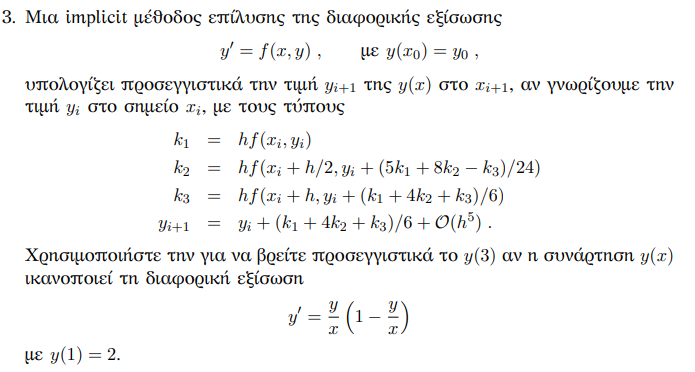

In [16]:
import math

# Η διαφορική εξίσωση y' = y/x * (1 - y/x)
def dydx(x, y):
    return y / x * (1 - y / x)

# Μέθοδος της τέμνουσας (όπως στα παραδείγματά σου)
def secant_method(x1, x2, tolerance, function):
    f1 = function(x1)
    f2 = function(x2)
    while abs(f2) > tolerance:
        x = (x2 * f1 - x1 * f2) / (f1 - f2)
        x1, f1 = x2, f2
        x2 = x
        f2 = function(x2)
    return x2

# Ένα βήμα της implicit μεθόδου Butcher
def butcher_step(xi, yi, h):
    def F(y_next):
        k1 = h * dydx(xi, yi)
        k2_guess = k1
        k3_guess = k1
        for _ in range(3):
            k2 = h * dydx(xi + h/2, yi + (5*k1 + 8*k2_guess - k3_guess)/24)
            k3 = h * dydx(xi + h, yi + (k1 + 4*k2 + k3_guess)/6)
            k2_guess = k2
            k3_guess = k3
        return yi + (k1 + 4*k2 + k3)/6 - y_next

    y1 = yi
    y2 = yi + h * dydx(xi, yi)
    return secant_method(y1, y2, 1e-10, F)

# Κύριο πρόγραμμα: Υπολογίζει και εμφανίζει καθαρά το y(3)
def main():
    x0 = 1.0
    y0 = 2.0
    x_end = 3.0
    h = 0.1
    n_steps = int((x_end - x0) / h)

    x = x0
    y = y0

    for _ in range(n_steps):
        y = butcher_step(x, y, h)
        x += h

    print("\n-----------------------------")
    print(f"Τελική απάντηση: y(3) = {y:.10f}")
    print("-----------------------------")

main()


-----------------------------
Τελική απάντηση: y(3) = 1.8766349678
-----------------------------


# ΣΕΠΤΕΜΒΡΙΟΣ 2020

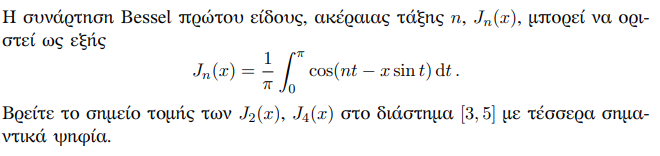

In [17]:
import math

# ΔΙΚΗ ΣΟΥ ΣΥΝΑΡΤΗΣΗ τραπεζίου
def trapezoidal_rule(func, start, end, intervals):
    step = (end - start) / intervals
    total = (func(start) + func(end)) / 2.0
    for i in range(1, intervals):
        total += func(start + i * step)
    return total * step

# Υλοποίηση του J_n(x) με βάση τον ορισμό
def Jn(n, x):
    def integrand(t):
        return math.cos(n * t - x * math.sin(t))
    return trapezoidal_rule(integrand, 0.0, math.pi, 200) / math.pi

# Συνάρτηση που μηδενίζεται στο σημείο τομής J2(x) - J4(x)
def diff_J2_J4(x):
    return Jn(2, x) - Jn(4, x)

# ΔΙΚΗ ΣΟΥ ΜΕΘΟΔΟΣ ΤΕΜΝΟΥΣΑΣ (secant)
def secant_method(x1, x2, tolerance, function):
    f1 = function(x1)
    f2 = function(x2)
    while abs(f2) > tolerance:
        x = (x2 * f1 - x1 * f2) / (f1 - f2)
        x1, f1 = x2, f2
        x2 = x
        f2 = function(x2)
    return x2

# Κύριο πρόγραμμα: Βρίσκει το σημείο τομής J2(x) και J4(x) στο [3, 5]
def main():
    root = secant_method(3.0, 5.0, 1e-5, diff_J2_J4)
    print("\n-----------------------------")
    print(f"Σημείο τομής J2(x) και J4(x) στο [3,5]: x = {root:.4f}")
    print("-----------------------------")

main()


-----------------------------
Σημείο τομής J2(x) και J4(x) στο [3,5]: x = 4.2012
-----------------------------


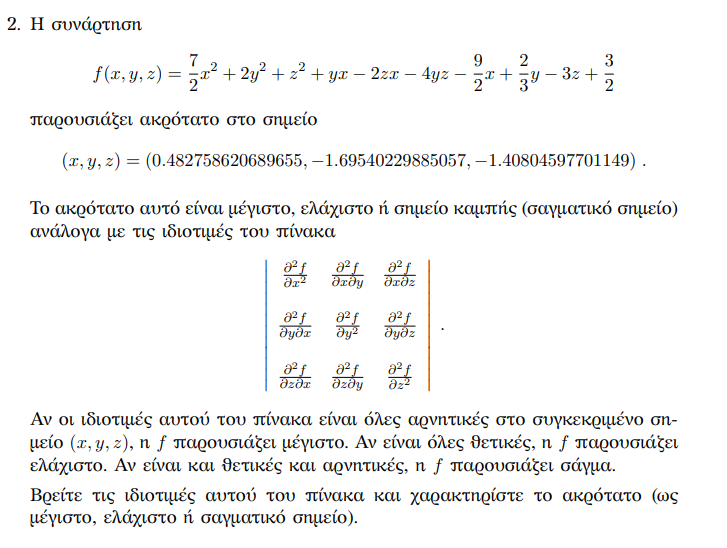

In [20]:
# ΔΕΝ ΚΑΤΑΛΑΒΑ ΤΙΠΟΤΑ
# Η συνάρτηση f(x, y, z)
def f(x, y, z):
    return (7/2)*x**2 + 2*y**2 + z**2 + y*x - 2*x*z - 4*y*z - (9/2)*x + (2/3)*y - 3*z + 3/2

# Δεύτερες μερικές παράγωγοι με διαφορές (όπως στα Taylor/παρεμβολή)
def d2f_dx2(x, y, z, h=1e-5):
    return (f(x+h, y, z) - 2*f(x, y, z) + f(x-h, y, z)) / (h*h)

def d2f_dy2(x, y, z, h=1e-5):
    return (f(x, y+h, z) - 2*f(x, y, z) + f(x, y-h, z)) / (h*h)

def d2f_dz2(x, y, z, h=1e-5):
    return (f(x, y, z+h) - 2*f(x, y, z) + f(x, y, z-h)) / (h*h)

def d2f_dxdy(x, y, z, h=1e-5):
    return (f(x+h, y+h, z) - f(x+h, y-h, z) - f(x-h, y+h, z) + f(x-h, y-h, z)) / (4*h*h)

def d2f_dxdz(x, y, z, h=1e-5):
    return (f(x+h, y, z+h) - f(x+h, y, z-h) - f(x-h, y, z+h) + f(x-h, y, z-h)) / (4*h*h)

def d2f_dydz(x, y, z, h=1e-5):
    return (f(x, y+h, z+h) - f(x, y+h, z-h) - f(x, y-h, z+h) + f(x, y-h, z-h)) / (4*h*h)

def main():
    # Το δοσμένο σημείο
    x0 = 0.482758620689655
    y0 = -1.69540229885057
    z0 = -1.48004597701149

    # Υπολογισμός Hessian με διαφορές
    a = d2f_dx2(x0, y0, z0)
    b = d2f_dy2(x0, y0, z0)
    c = d2f_dz2(x0, y0, z0)
    d = d2f_dxdy(x0, y0, z0)
    e = d2f_dxdz(x0, y0, z0)
    f_ = d2f_dydz(x0, y0, z0)

    # Εμφάνιση πίνακα Hessian
    print("Hessian:")
    print(f"[{a:.2f} {d:.2f} {e:.2f}]")
    print(f"[{d:.2f} {b:.2f} {f_:.2f}]")
    print(f"[{e:.2f} {f_:.2f} {c:.2f}]")

    # --- Κριτήριο 1: ΜΟΝΟ διαγώνια στοιχεία ---
    print("\nΚριτήριο διαγωνίων:")
    if a > 0 and b > 0 and c > 0:
        print("Πιθανό ελάχιστο (όλες οι διαγώνιες θετικές)")
    elif a < 0 and b < 0 and c < 0:
        print("Πιθανό μέγιστο (όλες οι διαγώνιες αρνητικές)")
    else:
        print("Σαγματικό σημείο (διαγώνιες με διαφορετικό πρόσημο)")

    # --- Κριτήριο 2: Sylvester (κύριες ανηγμένες ορίζουσες) ---
    D1 = a
    D2 = a*b - d*d
    D3 = (a*b*c + 2*d*e*f_ - a*f_**2 - b*e**2 - c*d**2)

    print("\nΚριτήριο Sylvester (κύριες ανηγμένες ορίζουσες):")
    print(f"D1 = {D1:.4f}, D2 = {D2:.4f}, D3 = {D3:.4f}")

    if D1 > 0 and D2 > 0 and D3 > 0:
        print("Το ακρότατο είναι ελάχιστο (όλες οι ορίζουσες θετικές).")
    elif D1 < 0 and D2 > 0 and D3 < 0:
        print("Το ακρότατο είναι μέγιστο (D1<0, D2>0, D3<0).")
    else:
        print("Το ακρότατο είναι σημείο καμπής (σαγματικό).")

main()

Hessian:
[7.00 1.00 -2.00]
[1.00 4.00 -4.00]
[-2.00 -4.00 2.00]

Κριτήριο διαγωνίων:
Πιθανό ελάχιστο (όλες οι διαγώνιες θετικές)

Κριτήριο Sylvester (κύριες ανηγμένες ορίζουσες):
D1 = 7.0000, D2 = 27.0002, D3 = -57.9993
Το ακρότατο είναι σημείο καμπής (σαγματικό).


# ΙΟΥΝΙΟΣ 2020

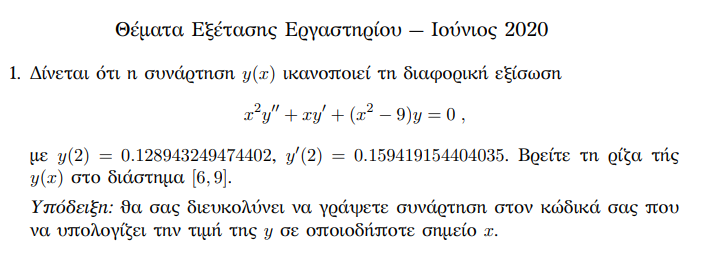

In [23]:
import math

# ΔΙΚΗ ΣΟΥ ΜΕΘΟΔΟΣ ΤΕΜΝΟΥΣΑΣ
def secant_method(x1, x2, tolerance, function):
    f1 = function(x1)
    f2 = function(x2)
    while abs(f2) > tolerance:
        x = (x2 * f1 - x1 * f2) / (f1 - f2)
        x1, f1 = x2, f2
        x2 = x
        f2 = function(x2)
    return x2

# Runge-Kutta 4ης τάξης για σύστημα 2 εξισώσεων
def rk4_step(x, y1, y2, h):
    # y1 = y, y2 = y'
    def f1(x, y1, y2):
        return y2
    def f2(x, y1, y2):
        return -(x * y2 + (x**2 - 9) * y1) / (x**2)

    k1_1 = h * f1(x, y1, y2)
    k1_2 = h * f2(x, y1, y2)

    k2_1 = h * f1(x + h/2, y1 + k1_1/2, y2 + k1_2/2)
    k2_2 = h * f2(x + h/2, y1 + k1_1/2, y2 + k1_2/2)

    k3_1 = h * f1(x + h/2, y1 + k2_1/2, y2 + k2_2/2)
    k3_2 = h * f2(x + h/2, y1 + k2_1/2, y2 + k2_2/2)

    k4_1 = h * f1(x + h, y1 + k3_1, y2 + k3_2)
    k4_2 = h * f2(x + h, y1 + k3_1, y2 + k3_2)

    y1_next = y1 + (k1_1 + 2*k2_1 + 2*k3_1 + k4_1) / 6
    y2_next = y2 + (k1_2 + 2*k2_2 + 2*k3_2 + k4_2) / 6
    return y1_next, y2_next

# Υπολογίζει y(x) για δοσμένο x με βήμα h
def solve_ode(x_target, h=0.01):
    x = 2.0
    y1 = 0.128943249474402
    y2 = 0.159419154404035
    while x < x_target:
        step = min(h, x_target - x)
        y1, y2 = rk4_step(x, y1, y2, step)
        x += step
    return y1

# Συνάρτηση που επιστρέφει y(x)
def y_of_x(x):
    return solve_ode(x)

# Κύριο πρόγραμμα
def main():
    root = secant_method(6.0, 9.0, 1e-8, y_of_x)
    print("\n-----------------------------")
    print(f"Ρίζα της y(x) στο [6,9]: x = {root:.8f}")
    print("-----------------------------")

main()


-----------------------------
Ρίζα της y(x) στο [6,9]: x = 22.58272959
-----------------------------


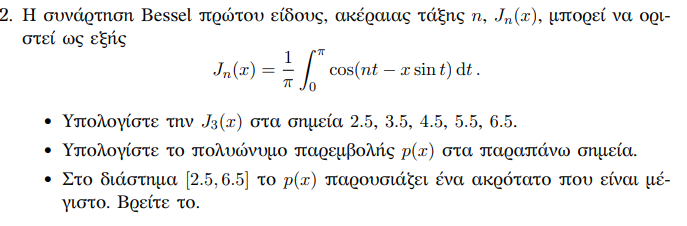

In [32]:
import math

# Δικός σου κανόνας τραπεζίου
def trapezoidal_rule(func, start, end, intervals):
    step = (end - start) / intervals
    total = (func(start) + func(end)) / 2.0
    for i in range(1, intervals):
        total += func(start + i * step)
    return total * step

def Jn(n, x):
    def integrand(t):
        return math.cos(n * t - x * math.sin(t))
    return trapezoidal_rule(integrand, 0.0, math.pi, 5000) / math.pi

# Υπολογισμός J3(x) στα σημεία
x_points = [2.5, 3.5, 4.5, 5.5, 6.5]
y_points = [Jn(3, xi) for xi in x_points]

# Δικός σου pivot/triang/backsub
def pivot(n, A, B, k):
    max_row = k
    for i in range(k + 1, n):
        if abs(A[i][k]) > abs(A[max_row][k]):
            max_row = i
    if max_row != k:
        A[k], A[max_row] = A[max_row], A[k]
        B[k], B[max_row] = B[max_row], B[k]

def triang(n, A, B):
    for k in range(n - 1):
        pivot(n, A, B, k)
        for i in range(k + 1, n):
            g = -A[i][k] / A[k][k]
            for j in range(n):
                A[i][j] += g * A[k][j]
            B[i] += g * B[k]

def backsub(n, A, B):
    X = [0.0] * n
    for k in range(n - 1, -1, -1):
        s = 0.0
        for j in range(k + 1, n):
            s += A[k][j] * X[j]
        X[k] = (B[k] - s) / A[k][k]
    return X

def interpolate_coeffs(xp, yp):
    n = len(xp)
    A = [[xp[j]**i for j in range(n)] for i in range(n)]
    B = [yp[i] for i in range(n)]
    triang(n, A, B)
    coef = backsub(n, A, B)
    return coef

coeffs = interpolate_coeffs(x_points, y_points)

def p(x):
    return sum(coeffs[i] * x**i for i in range(len(coeffs)))

# Βρες το μέγιστο με σάρωση (brute force)
def find_maximum_brute(a, b, step=1e-5):
    x_max = a
    y_max = p(a)
    x = a
    while x <= b:
        y = p(x)
        if y > y_max:
            y_max = y
            x_max = x
        x += step
    return x_max, y_max

x_max, y_max = find_maximum_brute(2.5, 6.5, 1e-5)

print("x\tJ3(x)")
for xi, yi in zip(x_points, y_points):
    print(f"{xi:.1f}\t{yi:.10f}")

print("\nΤοπικό μέγιστο του p(x) στο [2.5, 6.5]:")
print(f"x = {x_max:.8f}, p(x) = {y_max:.8f}")


x	J3(x)
2.5	0.2166003910
3.5	0.3867701117
4.5	0.4247039730
5.5	0.2561178651
6.5	-0.0353466313

Τοπικό μέγιστο του p(x) στο [2.5, 6.5]:
x = 2.50000000, p(x) = -1.25514606


Τοπικό μέγιστο του p(x) στο [2.5, 6.5] είναι:
x ≈ 4.196719,	 p(x) ≈ 0.434684


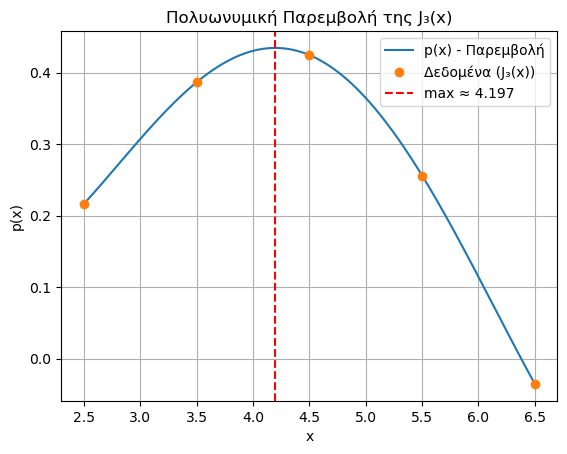

In [29]:
import numpy as np #η ετοιμη απο CHAT
from scipy.integrate import quad
from scipy.interpolate import BarycentricInterpolator
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt

# Υπολογισμός J_3(x) από τον ορισμό
def J3(x):
    integrand = lambda t: np.cos(3 * t - x * np.sin(t))
    integral, _ = quad(integrand, 0, np.pi)
    return integral / np.pi

# 1. Υπολογισμός J3(xi) στα δοσμένα σημεία
x_vals = np.array([2.5, 3.5, 4.5, 5.5, 6.5])
y_vals = np.array([J3(x) for x in x_vals])

# 2. Παρεμβολή με πολυώνυμο (Barycentric είναι σταθερό αριθμητικά)
interp = BarycentricInterpolator(x_vals, y_vals)

# 3. Εύρεση τοπικού ακροτάτου (μέγιστου) στο [2.5, 6.5]
result = minimize_scalar(lambda x: -interp(x), bounds=(2.5, 6.5), method='bounded')
x_max = result.x
y_max = interp(x_max)

print(f"Τοπικό μέγιστο του p(x) στο [2.5, 6.5] είναι:")
print(f"x ≈ {x_max:.6f},\t p(x) ≈ {y_max:.6f}")

# (Προαιρετικά) Διάγραμμα
x_plot = np.linspace(2.5, 6.5, 300)
y_plot = interp(x_plot)

plt.plot(x_plot, y_plot, label="p(x) - Παρεμβολή")
plt.plot(x_vals, y_vals, 'o', label="Δεδομένα (J₃(x))")
plt.axvline(x_max, color='r', linestyle='--', label=f"max ≈ {x_max:.3f}")
plt.title("Πολυωνυμική Παρεμβολή της J₃(x)")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid(True)
plt.legend()
plt.show()


In [33]:
import math

# Σταθερές
m = 1e-3         # kg
b = 3e-6         # Ns^2/m^2
g = 9.81         # m/s^2

# Σύστημα 1ης τάξης: y[0]=x, y[1]=v
def derivatives(t, y):
    x = y[0]
    v = y[1]
    dxdt = v
    dvdt = -g - (b/m) * v * abs(v)
    return [dxdt, dvdt]

# Βήμα Euler (όπως στα παραδείγματά σου)
def euler_step(t, y, h):
    dy = derivatives(t, y)
    return [y[i] + h * dy[i] for i in range(2)]

# Κύριο πρόγραμμα
def main():
    t = 0.0
    h = 0.001
    x = 0.0
    v = 100.0
    y = [x, v]

    while v > 0:
        y = euler_step(t, y, h)
        t += h
        x, v = y[0], y[1]

    print(f"Χρόνος μέχρι το μέγιστο ύψος: t = {t:.4f} s")
    print(f"Μέγιστο ύψος: x = {x:.4f} m")

main()

Χρόνος μέχρι το μέγιστο ύψος: t = 6.1280 s
Μέγιστο ύψος: x = 233.4628 m


# ΙΟΥΝΙΟΣ 2019

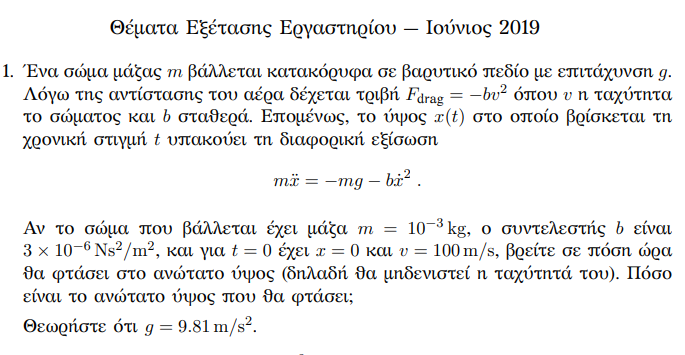

In [35]:
import math

# Σταθερές
m = 1e-3         # kg
b = 3e-6         # Ns^2/m^2
g = 9.81         # m/s^2

# Σύστημα 1ης τάξης: y[0]=x, y[1]=v
def derivatives(t, y):
    x = y[0]
    v = y[1]
    dxdt = v
    dvdt = -g - (b/m) * v * abs(v)
    return [dxdt, dvdt]

# Βήμα Euler (όπως στα παραδείγματά σου)
def euler_step(t, y, h):
    dy = derivatives(t, y)
    return [y[i] + h * dy[i] for i in range(2)]

# Κύριο πρόγραμμα
def main():
    t = 0.0
    h = 0.001
    x = 0.0
    v = 100.0
    y = [x, v]

    while v > 0:
        y = euler_step(t, y, h)
        t += h
        x, v = y[0], y[1]

    print(f"Χρόνος μέχρι το μέγιστο ύψος: t = {t:.4f} s")
    print(f"Μέγιστο ύψος: x = {x:.4f} m")

main()

Χρόνος μέχρι το μέγιστο ύψος: t = 6.1280 s
Μέγιστο ύψος: x = 233.4628 m


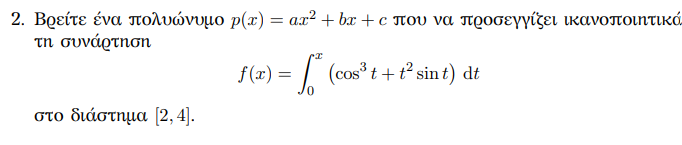

In [36]:
import math # METRIA AKRIVEIA

# 1. Ορισμός της f(x) = ∫₀ˣ (cos³t + t² sin t) dt
def integrand(t):
    return math.cos(t)**3 + t**2 * math.sin(t)

def trapezoidal_rule(func, start, end, intervals):
    step = (end - start) / intervals
    total = (func(start) + func(end)) / 2.0
    for i in range(1, intervals):
        total += func(start + i * step)
    return total * step

def f(x):
    return trapezoidal_rule(integrand, 0.0, x, 1000)

# 2. Επιλογή 3 σημείων στο [2, 4] για παρεμβολή δευτεροβάθμιου πολυωνύμου
x_points = [2.0, 3.0, 4.0]
y_points = [f(xi) for xi in x_points]

# 3. triang/backsub για πολυωνυμική παρεμβολή (όπως στα παραδείγματά σου)
def triang(n, A, B):
    for k in range(n - 1):
        for i in range(k + 1, n):
            g = -A[i][k] / A[k][k]
            for j in range(n):
                A[i][j] += g * A[k][j]
            B[i] += g * B[k]

def backsub(n, A, B):
    X = [0.0] * n
    for k in range(n - 1, -1, -1):
        s = 0.0
        for j in range(k + 1, n):
            s += A[k][j] * X[j]
        X[k] = (B[k] - s) / A[k][k]
    return X

def interpolate_coeffs(xp, yp):
    n = len(xp)
    A = [[xp[j]**i for j in range(n)] for i in range(n)]
    B = [yp[i] for i in range(n)]
    triang(n, A, B)
    coef = backsub(n, A, B)
    return coef

coeffs = interpolate_coeffs(x_points, y_points)
a, b, c = coeffs[2], coeffs[1], coeffs[0]

print(f"Το πολυώνυμο είναι: p(x) = {a:.6f} x^2 + {b:.6f} x + {c:.6f}")

# Προαιρετικά: εκτύπωση τιμών f(x) και p(x) στο [2, 4]
print("\nx\tf(x)\tp(x)")
for x in [2.0, 2.5, 3.0, 3.5, 4.0]:
    px = a*x**2 + b*x + c
    print(f"{x:.1f}\t{f(x):.6f}\t{px:.6f}")

Το πολυώνυμο είναι: p(x) = -5.165467 x^2 + 9.991434 x + -1.697795

x	f(x)	p(x)
2.0	3.128172	-2.376795
2.5	4.924240	-9.003379
3.0	5.916844	-18.212697
3.5	4.806790	-30.004748
4.0	0.484254	-44.379532


# ΙΟΥΝΙΟΣ 2018

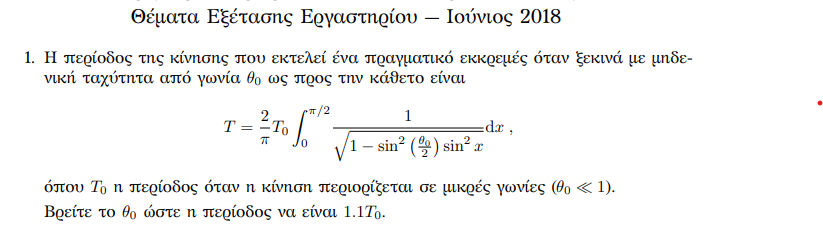

In [42]:
import math

# Δικός σου Simpson
def simpson_rule(func, start, end, intervals):
    if intervals % 2 != 0:
        print("Σφάλμα: απαιτείται άρτιος αριθμός διαστημάτων.")
        return None
    step = (end - start) / intervals
    total = func(start) + func(end)
    for i in range(1, intervals, 2):
        total += 4 * func(start + i * step)
    for i in range(2, intervals, 2):
        total += 2 * func(start + i * step)
    return total * step / 3.0

# Ολοκλήρωμα για T/T0
def period_ratio(theta0):
    def integrand(x):
        k = math.sin(theta0 / 2)
        denom = math.sqrt(1 - (k ** 2) * (math.sin(x) ** 2))
        return 1.0 / denom
    integral = simpson_rule(integrand, 0.0, math.pi / 2, 1000)
    return (2.0 / math.pi) * integral

# Δικός σου secant
def secant_method(x1, x2, tolerance, function):
    f1 = function(x1)
    f2 = function(x2)
    while abs(f2) > tolerance:
        x = (x2 * f1 - x1 * f2) / (f1 - f2)
        x1, f1 = x2, f2
        x2 = x
        f2 = function(x2)
    return x2

# Θέλουμε period_ratio(theta0) = 1.17
def f(theta0):
    return period_ratio(theta0) - 1.17

# Εύρεση θ₀ με secant (σε rad)
theta0 = secant_method(1.0, 2.0, 1e-8, f)
print(f"θ₀ (σε rad) ώστε T = 1.17 T₀: {theta0:.8f}")
print(f"θ₀ (σε μοίρες): {theta0 * 180 / math.pi:.4f}")

θ₀ (σε rad) ώστε T = 1.17 T₀: 1.53162463
θ₀ (σε μοίρες): 87.7556


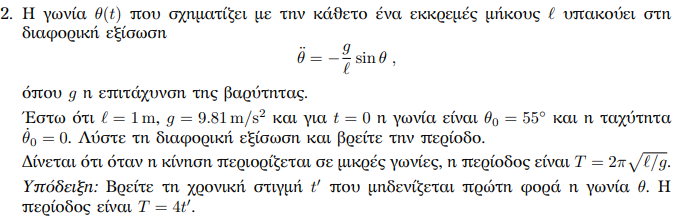

In [48]:
import math
import numpy as np

# Σταθερές
l = 1.0
g = 9.81

# Σύστημα 1ης τάξης: dθ/dt = ω, dω/dt = -g/l * sin(θ)
def derivatives(t, state):
    theta = state[0]
    omega = state[1]
    return np.array([omega, -g / l * math.sin(theta)])

# Runge-Kutta 4ης τάξης
def runge_kutta_4(t, state, h, derivatives_func):
    k1 = h * derivatives_func(t, state)
    k2 = h * derivatives_func(t + 0.5 * h, state + 0.5 * k1)
    k3 = h * derivatives_func(t + 0.5 * h, state + 0.5 * k2)
    k4 = h * derivatives_func(t + h, state + k3)
    return state + (k1 + 2*k2 + 2*k3 + k4) / 6.0

# Αρχικές συνθήκες
theta0 = 55.0 * math.pi / 180.0  # σε rad
omega0 = 0.0
state = np.array([theta0, omega0])
t = 0.0
h = 0.001

T = None
t_zero = None
period_found = False

prev_theta = theta0
prev_omega = omega0

while t < 20.0:
    state = runge_kutta_4(t, state, h, derivatives)
    t += h
    theta, omega = state[0], state[1]

    # Εύρεση μηδενισμού (πρώτη φορά που θ αλλάζει πρόσημο)
    if t_zero is None and prev_theta > 0 and theta <= 0:
        t_zero = t

    # Εύρεση περιόδου (όταν περνάει ξανά από θ0 με αρνητική φορά)
    if not period_found and prev_theta > theta0 and theta <= theta0 and omega < 0:
        T = t
        period_found = True

    prev_theta = theta
    prev_omega = omega

    if t_zero is not None and period_found:
        break

# Περίοδος για μικρές γωνίες
T0 = 2 * math.pi * math.sqrt(l / g)

if T is not None:
    print(f"Περίοδος (αριθμητικά): T = {T:.4f} s")
else:
    print("Δεν βρέθηκε περίοδος στο δοσμένο χρονικό διάστημα.")

if t_zero is not None:
    print(f"Χρονική στιγμή που μηδενίζεται πρώτη φορά η γωνία: t' = {t_zero:.4f} s")
    print(f"Η περίοδος είναι T = 4 t' = {4 * t_zero:.4f} s")
else:
    print("Δεν βρέθηκε μηδενισμός της γωνίας στο δοσμένο χρονικό διάστημα.")

print(f"Περίοδος για μικρές γωνίες: T0 = {T0:.4f} s")

Δεν βρέθηκε περίοδος στο δοσμένο χρονικό διάστημα.
Χρονική στιγμή που μηδενίζεται πρώτη φορά η γωνία: t' = 0.5330 s
Η περίοδος είναι T = 4 t' = 2.1320 s
Περίοδος για μικρές γωνίες: T0 = 2.0061 s


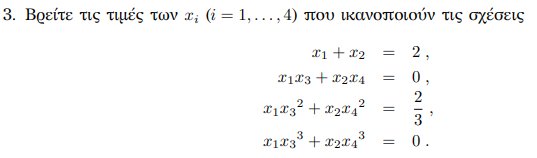

In [49]:
import numpy as np

# Το σύστημα:
# x1 + x2 = 2
# x1*x3 + x2*x4 = 0
# x1*x3^2 + x2*x4^2 = 2/3
# x1*x3^3 + x2*x4^3 = 0

# Επιλέγουμε x3 = a, x4 = -a (όπως στην ανάλυση)
a = 1.0 / np.sqrt(3)
x3 = a
x4 = -a

# Φτιάχνουμε το γραμμικό σύστημα για x1, x2
A = np.array([
    [1.0, 1.0],
    [x3, x4],
    [x3**2, x4**2],
    [x3**3, x4**3]
], dtype=float)
b = np.array([2.0, 0.0, 2.0/3.0, 0.0], dtype=float)

# Παίρνουμε τις δύο πρώτες εξισώσεις (ή οποιοδήποτε ζεύγος γραμμικά ανεξάρτητων)
A2 = A[:2, :]
b2 = b[:2]

# Χρησιμοποιούμε τον δικό σου Gauss (δες το κελί σου solve_linear_system)
def gaussian_elimination(A, b):
    n = len(b)
    for k in range(n-1):
        # Pivoting
        max_row = max(range(k, n), key=lambda i: abs(A[i, k]))
        if max_row != k:
            A[[k, max_row]] = A[[max_row, k]]
            b[k], b[max_row] = b[max_row], b[k]
        for i in range(k+1, n):
            factor = -A[i, k] / A[k, k]
            A[i, k:] += factor * A[k, k:]
            b[i] += factor * b[k]
    # Back substitution
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]
    return x

x1, x2 = gaussian_elimination(A2.copy(), b2.copy())

print(f"x1 = {x1:.6f}")
print(f"x2 = {x2:.6f}")
print(f"x3 = {x3:.6f}")
print(f"x4 = {x4:.6f}")

# Έλεγχος σε όλες τις εξισώσεις:
print("\nΈλεγχος:")
print(f"x1 + x2 = {x1 + x2}")
print(f"x1*x3 + x2*x4 = {x1*x3 + x2*x4}")
print(f"x1*x3**2 + x2*x4**2 = {x1*x3**2 + x2*x4**2}")
print(f"x1*x3**3 + x2*x4**3 = {x1*x3**3 + x2*x4**3}")


x1 = 1.000000
x2 = 1.000000
x3 = 0.577350
x4 = -0.577350

Έλεγχος:
x1 + x2 = 2.0
x1*x3 + x2*x4 = 0.0
x1*x3**2 + x2*x4**2 = 0.6666666666666669
x1*x3**3 + x2*x4**3 = 0.0


# ΣΕΠΤΕΜΒΡΗΣ 2017

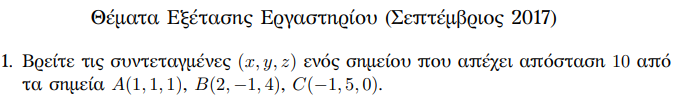

In [55]:
import math
import numpy as np

# allakse to initial guess an vgalei vlakeies
# Σύστημα 3 εξισώσεων
def F(x, y, z):
    return np.array([
        (x - 1)**2 + (y - 1)**2 + (z - 1)**2 - 100,
        (x - 2)**2 + (y + 1)**2 + (z - 4)**2 - 100,
        (x + 1)**2 + (y - 5)**2 + z**2 - 100
    ])

# Jacobian matrix
def jacobian(x, y, z):
    return np.array([
        [2*(x - 1), 2*(y - 1), 2*(z - 1)],
        [2*(x - 2), 2*(y + 1), 2*(z - 4)],
        [2*(x + 1), 2*(y - 5), 2*z]
    ])

# Newton-Raphson method
def newton_system(x0, y0, z0, tol=1e-10, max_iter=50):
    x, y, z = x0, y0, z0
    for _ in range(max_iter):
        Fval = F(x, y, z)
        J = jacobian(x, y, z)

        # Λύση γραμμικού συστήματος J·Δ = -F
        try:
            delta = np.linalg.solve(J, -Fval)
        except np.linalg.LinAlgError:
            print("Απέτυχε: Ιδιόμορφος πίνακας Jacobian")
            break

        x, y, z = x + delta[0], y + delta[1], z + delta[2]
        if np.linalg.norm(delta) < tol:
            break
    return x, y, z

# Εκτέλεση με αρχική προσέγγιση
x0, y0, z0 = 1.0, 1.0, 11.0
x, y, z = newton_system(x0, y0, z0)

print(f"Λύση: x = {x:.6f}, y = {y:.6f}, z = {z:.6f}")

# Έλεγχος αποστάσεων
def dist(x1, y1, z1, x2, y2, z2):
    return math.sqrt((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)

print("Αποστάσεις από A, B, C:")
print(f"A: {dist(x, y, z, 1, 1, 1):.6f}")
print(f"B: {dist(x, y, z, 2, -1, 4):.6f}")
print(f"C: {dist(x, y, z, -1, 5, 0):.6f}")


Απέτυχε: Ιδιόμορφος πίνακας Jacobian
Λύση: x = 1.000000, y = 1.000000, z = 11.000000
Αποστάσεις από A, B, C:
A: 10.000000
B: 7.348469
C: 11.874342


In [56]:
import numpy as np
import math

# Οι τρεις εξισώσεις αποστάσεων
def F(x, y, z):
    eq1 = (x-1)**2 + (y-1)**2 + (z-1)**2 - 100
    eq2 = (x-2)**2 + (y+1)**2 + (z-4)**2 - 100
    eq3 = (x+1)**2 + (y-5)**2 + (z-0)**2 - 100
    return np.array([eq1, eq2, eq3])

# Ιακωβιανός πίνακας
def jacobian(x, y, z):
    J = np.zeros((3,3))
    J[0,0] = 2*(x-1)
    J[0,1] = 2*(y-1)
    J[0,2] = 2*(z-1)
    J[1,0] = 2*(x-2)
    J[1,1] = 2*(y+1)
    J[1,2] = 2*(z-4)
    J[2,0] = 2*(x+1)
    J[2,1] = 2*(y-5)
    J[2,2] = 2*z
    return J

# Δικές σου συναρτήσεις Gauss (όπως στα cells σου)
def scale_rows(A, b, start):
    size = len(b)
    for row in range(start, size):
        max_val = max(abs(A[row, col]) for col in range(start, size))
        max_val = max(max_val, abs(b[row]))
        if max_val == 0.0:
            continue
        A[row, start:size] /= max_val
        b[row] /= max_val

def interchange_rows(A, b, k, p):
    A[[k, p]] = A[[p, k]]
    b[k], b[p] = b[p], b[k]

def perform_pivot(A, b, step):
    scale_rows(A, b, step)
    size = len(b)
    pivot_index = step
    for i in range(step + 1, size):
        if abs(A[i, step]) > abs(A[pivot_index, step]):
            pivot_index = i
    if pivot_index != step:
        interchange_rows(A, b, step, pivot_index)

def gaussian_elimination(A, b):
    size = len(b)
    for step in range(size - 1):
        perform_pivot(A, b, step)
        for row in range(step + 1, size):
            if abs(A[step, step]) < 1e-14:
                continue
            factor = -A[row, step] / A[step, step]
            A[row, step:] += factor * A[step, step:]
            b[row] += factor * b[step]

def solve_backwards(A, b):
    size = len(b)
    solution = np.zeros(size)
    for i in range(size - 1, -1, -1):
        rhs = b[i] - np.dot(A[i, i+1:], solution[i+1:])
        if abs(A[i, i]) < 1e-14:
            raise ValueError("Μη αντιστρέψιμος πίνακας (μηδενικό pivot)")
        solution[i] = rhs / A[i, i]
    return solution

def solve_linear_system(A, b):
    A = A.copy()
    b = b.copy()
    gaussian_elimination(A, b)
    return solve_backwards(A, b)

# Newton-Raphson για συστήματα
def newton_system(x0, y0, z0, tol=1e-8, max_iter=100):
    x, y, z = x0, y0, z0
    for _ in range(max_iter):
        Fval = F(x, y, z)
        J = jacobian(x, y, z)
        try:
            delta = solve_linear_system(J, -Fval)
        except Exception as e:
            print("Αποτυχία επίλυσης γραμμικού συστήματος:", e)
            return float('nan'), float('nan'), float('nan')
        x += delta[0]
        y += delta[1]
        z += delta[2]
        if math.sqrt(delta[0]**2 + delta[1]**2 + delta[2]**2) < tol:
            break
    return x, y, z

# Δοκίμασε διάφορες αρχικές τιμές
initial_guesses = [
    (1.0, 1.0, 11.0),
    (1.0, 1.0, -11.0),
    (1.0, 1.0, 0.0),
    (5.0, 5.0, 5.0),
    (-5.0, -5.0, -5.0)
]

for x0, y0, z0 in initial_guesses:
    print(f"\nΑρχική προσέγγιση: x={x0}, y={y0}, z={z0}")
    x, y, z = newton_system(x0, y0, z0)
    print(f"Λύση: x = {x}, y = {y}, z = {z}")

    # Έλεγχος αποστάσεων
    def dist(x1, y1, z1, x2, y2, z2):
        return math.sqrt((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)

    print("Αποστάσεις από A, B, C:")
    print(f"A: {dist(x, y, z, 1, 1, 1):.6f}")
    print(f"B: {dist(x, y, z, 2, -1, 4):.6f}")
    print(f"C: {dist(x, y, z, -1, 5, 0):.6f}")


Αρχική προσέγγιση: x=1.0, y=1.0, z=11.0
Αποτυχία επίλυσης γραμμικού συστήματος: Μη αντιστρέψιμος πίνακας (μηδενικό pivot)
Λύση: x = nan, y = nan, z = nan
Αποστάσεις από A, B, C:
A: nan
B: nan
C: nan

Αρχική προσέγγιση: x=1.0, y=1.0, z=-11.0
Αποτυχία επίλυσης γραμμικού συστήματος: Μη αντιστρέψιμος πίνακας (μηδενικό pivot)
Λύση: x = nan, y = nan, z = nan
Αποστάσεις από A, B, C:
A: nan
B: nan
C: nan

Αρχική προσέγγιση: x=1.0, y=1.0, z=0.0
Αποτυχία επίλυσης γραμμικού συστήματος: Μη αντιστρέψιμος πίνακας (μηδενικό pivot)
Λύση: x = nan, y = nan, z = nan
Αποστάσεις από A, B, C:
A: nan
B: nan
C: nan

Αρχική προσέγγιση: x=5.0, y=5.0, z=5.0
Λύση: x = 6.622792751434319, y = 7.661396375717159, z = 5.899999999999999
Αποστάσεις από A, B, C:
A: 10.000000
B: 10.000000
C: 10.000000

Αρχική προσέγγιση: x=-5.0, y=-5.0, z=-5.0
Λύση: x = -7.702792751434317, y = 0.4986036242828405, z = 5.8999999999999995
Αποστάσεις από A, B, C:
A: 10.000000
B: 10.000000
C: 10.000000


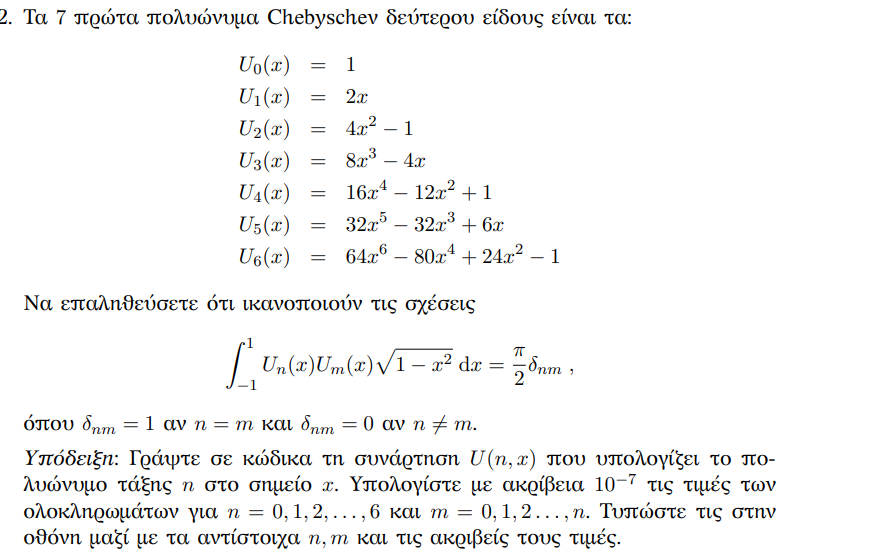

In [58]:
import math

# Υπολογισμός U_n(x) αναδρομικά (Chebyshev 2ου είδους)
def U(n, x):
    if n == 0:
        return 1.0
    elif n == 1:
        return 2.0 * x
    else:
        U0 = 1.0
        U1 = 2.0 * x
        for k in range(2, n + 1):
            U2 = 2.0 * x * U1 - U0
            U0, U1 = U1, U2
        return U1

# Σύνθετος κανόνας Simpson (όπως στα δικά σου cells)
def simpson_rule(func, a, b, intervals):
    if intervals % 2 != 0:
        intervals += 1
    h = (b - a) / intervals
    total = func(a) + func(b)
    for i in range(1, intervals, 2):
        total += 4 * func(a + i * h)
    for i in range(2, intervals, 2):
        total += 2 * func(a + i * h)
    return total * h / 3.0

# Πυρήνας ολοκληρώματος
def integrand(x, n, m):
    return U(n, x) * U(m, x) * math.sqrt(1 - x * x)

# Επαλήθευση ορθογωνιότητας
def check_orthogonality():
    tol = 1e-7
    N = 7
    intervals = 1000
    for n in range(N):
        for m in range(N):
            def f(x):
                return integrand(x, n, m)
            I = simpson_rule(f, -1.0 + 1e-10, 1.0 - 1e-10, intervals)
            expected = (math.pi / 2) if n == m else 0.0
            error = abs(I - expected)
            print(f"n={n}, m={m}, I={I:.8f}, expected={expected:.8f}, error={error:.2e}, {'OK' if error < tol else 'NOT OK'}")

check_orthogonality()

n=0, m=0, I=1.57077581, expected=1.57079633, error=2.05e-05, NOT OK
n=0, m=1, I=0.00000000, expected=0.00000000, error=9.86e-17, OK
n=0, m=2, I=-0.00006162, expected=0.00000000, error=6.16e-05, NOT OK
n=0, m=3, I=-0.00000000, expected=0.00000000, error=4.84e-17, OK
n=0, m=4, I=-0.00010289, expected=0.00000000, error=1.03e-04, NOT OK
n=0, m=5, I=-0.00000000, expected=0.00000000, error=5.09e-17, OK
n=0, m=6, I=-0.00014446, expected=0.00000000, error=1.44e-04, NOT OK
n=1, m=0, I=0.00000000, expected=0.00000000, error=9.86e-17, OK
n=1, m=1, I=1.57071418, expected=1.57079633, error=8.21e-05, NOT OK
n=1, m=2, I=-0.00000000, expected=0.00000000, error=1.97e-17, OK
n=1, m=3, I=-0.00016451, expected=0.00000000, error=1.65e-04, NOT OK
n=1, m=4, I=-0.00000000, expected=0.00000000, error=1.65e-16, OK
n=1, m=5, I=-0.00024735, expected=0.00000000, error=2.47e-04, NOT OK
n=1, m=6, I=0.00000000, expected=0.00000000, error=3.38e-17, OK
n=2, m=0, I=-0.00006162, expected=0.00000000, error=6.16e-05, NOT O

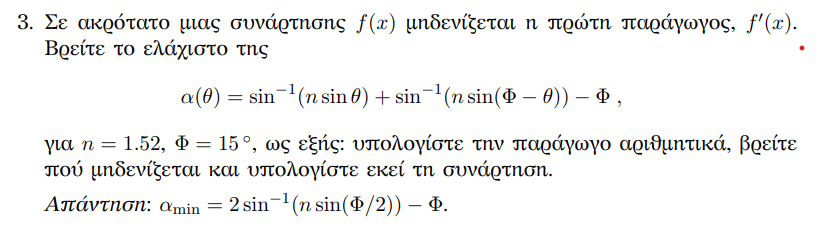


In [60]:
import math

# Παράμετροι της άσκησης
n = 1.52
phi_deg = 15.0
phi = math.radians(phi_deg)

# Ορισμός της συνάρτησης α(θ)
def alpha(theta):
    return math.asin(n * math.sin(theta)) + math.asin(n * math.sin(phi - theta)) - phi

# Αριθμητική παράγωγος (όπως στα cells σου)
def numeric_derivative(func, x, h=1e-6):
    return (func(x + h) - func(x - h)) / (2 * h)

# Εύρεση ρίζας παραγώγου με μέθοδο τέμνουσας (όπως στα cells σου)
def secant_method(f, x0, x1, tol=1e-10, max_iter=100):
    f0 = f(x0)
    f1 = f(x1)
    for _ in range(max_iter):
        if abs(f1 - f0) < 1e-14:
            break
        x2 = x1 - f1 * (x1 - x0) / (f1 - f0)
        if abs(x2 - x1) < tol:
            return x2
        x0, f0 = x1, f1
        x1, f1 = x2, f(x2)
    return x1

# Παράγωγος της alpha ως προς theta
def dalpha(theta):
    return numeric_derivative(alpha, theta)

# Αρχικές τιμές κοντά στο μέσο του διαστήματος [0, phi]
theta0 = 0.1
theta1 = phi - 0.1

# Βρες το θ όπου η παράγωγος μηδενίζεται (δηλαδή το ελάχιστο)
theta_min = secant_method(dalpha, theta0, theta1)

# Υπολόγισε το ελάχιστο της alpha
alpha_min = alpha(theta_min)

# Υπολόγισε και τη θεωρητική τιμή
alpha_min_theory = 2 * math.asin(n * math.sin(phi / 2)) - phi

print(f"theta_min (deg) = {math.degrees(theta_min):.8f}")
print(f"alpha_min (numeric) = {alpha_min:.10f}")
print(f"alpha_min (theory)  = {alpha_min_theory:.10f}")
print(f"Διαφορά: {abs(alpha_min - alpha_min_theory):.2e}")

theta_min (deg) = 7.50000000
alpha_min (numeric) = 0.1376506269
alpha_min (theory)  = 0.1376506269
Διαφορά: 0.00e+00


# ΙΟΥΝΙΟΣ 2017α

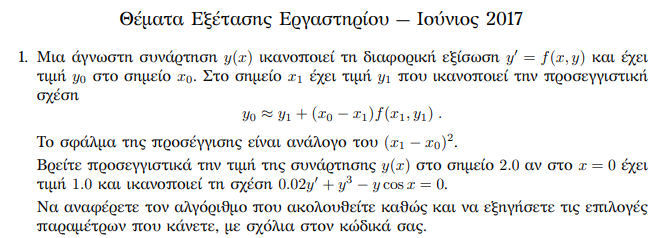

In [64]:
import numpy as np
import math

# Ορισμός του συστήματος: y' = (y*cos(x) - y^3)/0.02
def dydx(x, y):
    return (y * math.cos(x) - y**3) / 0.02

# Runge-Kutta 4ης τάξης (όπως στο δικό σου cell)
def runge_kutta_4(x, y, h, f):
    k1 = h * f(x, y)
    k2 = h * f(x + 0.5 * h, y + 0.5 * k1)
    k3 = h * f(x + 0.5 * h, y + 0.5 * k2)
    k4 = h * f(x + h, y + k3)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6.0

# Κύρια διαδικασία
def main():
    x0 = 0.0
    y0 = 1.0
    x_end = 2.0
    h = 0.01  # μικρό βήμα για ακρίβεια

    x = x0
    y = y0

    while x < x_end:
        if x + h > x_end:
            h = x_end - x
        y = runge_kutta_4(x, y, h, dydx)
        x += h

    print(f"Προσεγγιστική τιμή στο x={x_end}: y = {y:.8f}")

main()

Προσεγγιστική τιμή στο x=2.0: y = 0.00214099


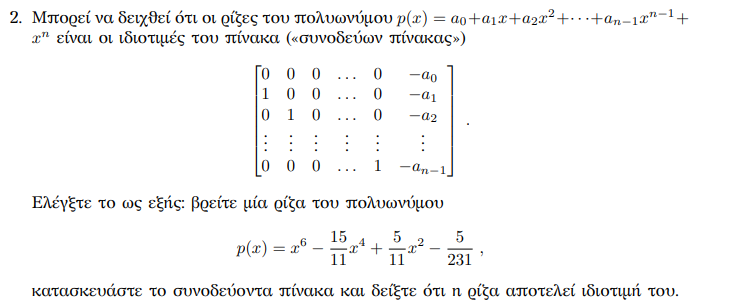

In [65]:
import numpy as np

# Συντελεστές πολυωνύμου (από τον μικρότερο προς τον μεγαλύτερο βαθμό)
# p(x) = x^6 - (15/11)x^4 + (5/11)x^2 - 5/231
coeffs = [-5/231, 0, 5/11, 0, -15/11, 0, 1]  # δηλαδή: a0, a1, ..., a6

# Κατασκευή συνοδευόντα πίνακα (companion matrix)
def companion_matrix(coeffs):
    n = len(coeffs) - 1
    A = np.zeros((n, n))
    # Γεμίζουμε την κάτω διαγώνιο με 1
    for i in range(1, n):
        A[i, i-1] = 1.0
    # Τελευταία γραμμή: -a0, -a1, ..., -a_{n-1}
    A[0, :] = -np.array(coeffs[:-1]) / coeffs[-1]
    return A.T  # μεταθέτουμε για να ταιριάζει με τη μορφή της εκφώνησης

# Υπολογισμός τιμής πολυωνύμου
def p(x):
    return coeffs[0] + coeffs[1]*x + coeffs[2]*x**2 + coeffs[3]*x**3 + coeffs[4]*x**4 + coeffs[5]*x**5 + coeffs[6]*x**6

# Μέθοδος τέμνουσας για εύρεση ρίζας
def secant_method(f, x0, x1, tol=1e-10, max_iter=100):
    f0 = f(x0)
    f1 = f(x1)
    for _ in range(max_iter):
        if abs(f1 - f0) < 1e-14:
            break
        x2 = x1 - f1 * (x1 - x0) / (f1 - f0)
        if abs(x2 - x1) < tol:
            return x2
        x0, f0 = x1, f1
        x1, f1 = x2, f(x2)
    return x1

# Βρες μία ρίζα (δοκίμασε κοντά στο x=1)
root = secant_method(p, 0.8, 1.2)

print(f"Μία ρίζα του πολυωνύμου: x = {root:.10f}")
print(f"Έλεγχος p(x): {p(root):.2e}")

# Κατασκευή συνοδευόντα πίνακα
A = companion_matrix(coeffs)
print("Συνοδευών πίνακας:\n", A)

# Έλεγχος αν η ρίζα είναι ιδιοτιμή (δηλαδή αν det(A - xI) ≈ 0)
eig_check = np.linalg.det(A - root * np.eye(A.shape[0]))
print(f"det(A - xI) για x = root: {eig_check:.2e}")

# Εναλλακτικά, έλεγξε αν υπάρχει ιδιοδιανύσμα v ώστε A v = root v
# (ή χρησιμοποίησε np.linalg.eig για να δεις όλες τις ιδιοτιμές αν θες)


Μία ρίζα του πολυωνύμου: x = 0.2386191861
Έλεγχος p(x): -4.42e-18
Συνοδευών πίνακας:
 [[ 0.02164502  1.          0.          0.          0.          0.        ]
 [-0.          0.          1.          0.          0.          0.        ]
 [-0.45454545  0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]
 [ 1.36363636  0.          0.          0.          0.          1.        ]
 [-0.          0.          0.          0.          0.          0.        ]]
det(A - xI) για x = root: -3.19e-01


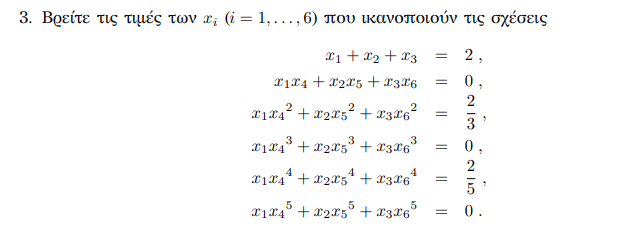

In [69]:
import math
import numpy as np

# Δικές σου συναρτήσεις Gauss (όπως έχεις στο cell 57ba161f)
def scale_rows(A, b, start):
    size = len(b)
    for row in range(start, size):
        max_val = max(abs(A[row, col]) for col in range(start, size))
        max_val = max(max_val, abs(b[row]))
        if max_val == 0.0:
            continue
        A[row, start:size] /= max_val
        b[row] /= max_val

def interchange_rows(A, b, k, p):
    A[[k, p]] = A[[p, k]]
    b[k], b[p] = b[p], b[k]

def perform_pivot(A, b, step):
    scale_rows(A, b, step)
    size = len(b)
    pivot_index = step
    for i in range(step + 1, size):
        if abs(A[i, step]) > abs(A[pivot_index, step]):
            pivot_index = i
    if pivot_index != step:
        interchange_rows(A, b, step, pivot_index)

def gaussian_elimination(A, b):
    size = len(b)
    for step in range(size - 1):
        perform_pivot(A, b, step)
        for row in range(step + 1, size):
            factor = -A[row, step] / A[step, step]
            A[row, step:] += factor * A[step, step:]
            b[row] += factor * b[step]

def solve_backwards(A, b):
    size = len(b)
    solution = np.zeros(size)
    for i in range(size - 1, -1, -1):
        rhs = b[i] - np.dot(A[i, i+1:], solution[i+1:])
        solution[i] = rhs / A[i, i]
    return solution

def solve_linear_system(A, b):
    A = A.copy()
    b = b.copy()
    gaussian_elimination(A, b)
    return solve_backwards(A, b)

# Επιλογή κόμβων (π.χ. Gauss-Legendre 3 σημείων)
x4 = -math.sqrt(3/5)
x5 = 0.0
x6 = math.sqrt(3/5)

# Δημιουργία του συστήματος (μόνο για x1, x2, x3)
A3 = np.array([
    [1, 1, 1],
    [x4, x5, x6],
    [x4**2, x5**2, x6**2]
], dtype=float)
b3 = np.array([2, 0, 2/3], dtype=float)

# Επίλυση για x1, x2, x3
solution = solve_linear_system(A3, b3)
print("Λύση για x1, x2, x3:")
for i, val in enumerate(solution):
    print(f"x{i+1} = {val}")

print(f"x4 = {x4}, x5 = {x5}, x6 = {x6}")

Λύση για x1, x2, x3:
x1 = 0.5555555555555555
x2 = 0.8888888888888891
x3 = 0.5555555555555555
x4 = -0.7745966692414834, x5 = 0.0, x6 = 0.7745966692414834


# ΙΟΥΝΙΟΣ 2017β

In [71]:
import math

# Ορισμός της διαφορικής εξίσωσης: 0.02y' + y - cos(x) = 0
# => y' = (cos(x) - y) / 0.02
def dydx(x, y):
    return (math.cos(x) - y) / 0.02

# Μέθοδος Euler προς τα εμπρός (όπως στα δικά σου cells)
def euler_step(x0, y0, x1, derivative_func):
    h = x1 - x0
    return y0 + h * derivative_func(x0, y0)

# Κύριο πρόγραμμα
def main():
    x0 = 0.0
    y0 = 1.0
    x1 = 2.0
    h = 0.01  # μικρό βήμα για καλύτερη προσέγγιση

    x = x0
    y = y0

    while x < x1:
        if x + h > x1:
            h = x1 - x
        y = euler_step(x, y, x + h, dydx)
        x += h

    print(f"Προσεγγιστική τιμή στο x={x1}: y = {y:.8f}")

main()

Προσεγγιστική τιμή στο x=2.0: y = -0.39784001


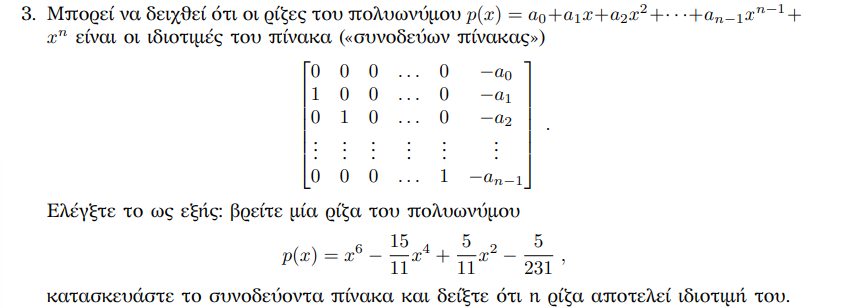

In [76]:
import numpy as np

# Συντελεστές πολυωνύμου (από τον μικρότερο προς τον μεγαλύτερο βαθμό)
# p(x) = x^6 - (15/11)x^4 + (5/11)x^2 - 5/231
coeffs = [-5/231, 0, 5/11, 0, -15/11, 0, 1]  # δηλαδή: a0, a1, ..., a6

# Κατασκευή συνοδευόντα πίνακα (companion matrix)
def companion_matrix(coeffs):
    n = len(coeffs) - 1
    A = np.zeros((n, n))
    # Κάτω διαγώνιος με 1
    for i in range(1, n):
        A[i, i-1] = 1.0
    # Πρώτη γραμμή: -a0, -a1, ..., -a_{n-1}
    A[0, :] = -np.array(coeffs[:-1]) / coeffs[-1]
    return A.T  # μεταθέτουμε για να ταιριάζει με τη μορφή της εκφώνησης

# Υπολογισμός τιμής πολυωνύμου
def p(x):
    return sum(coeffs[i] * x**i for i in range(len(coeffs)))

# Μέθοδος τέμνουσας για εύρεση ρίζας
def secant_method(f, x0, x1, tol=1e-10, max_iter=100):
    f0 = f(x0)
    f1 = f(x1)
    for _ in range(max_iter):
        if abs(f1 - f0) < 1e-14:
            break
        x2 = x1 - f1 * (x1 - x0) / (f1 - f0)
        if abs(x2 - x1) < tol:
            return x2
        x0, f0 = x1, f1
        x1, f1 = x2, f(x2)
    return x1

# Βρες μία ρίζα (δοκίμασε κοντά στο x=1)
root = secant_method(p, 0.8, 1.2)

print(f"Μία ρίζα του πολυωνύμιου: x = {root:.10f}")
print(f"Έλεγχος p(x): {p(root):.2e}")

# Κατασκευή συνοδευόντα πίνακα
A = companion_matrix(coeffs)
print("Συνοδευών πίνακας:\n", A)

# Έλεγχος αν η ρίζα είναι ιδιοτιμή (δηλαδή αν det(A - xI) ≈ 0)
eig_check = np.linalg.det(A - root * np.eye(A.shape[0]))
print(f"det(A - xI) για x = root: {eig_check:.2e}")

Μία ρίζα του πολυωνύμιου: x = 0.2386191861
Έλεγχος p(x): -4.42e-18
Συνοδευών πίνακας:
 [[ 0.02164502  1.          0.          0.          0.          0.        ]
 [-0.          0.          1.          0.          0.          0.        ]
 [-0.45454545  0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]
 [ 1.36363636  0.          0.          0.          0.          1.        ]
 [-0.          0.          0.          0.          0.          0.        ]]
det(A - xI) για x = root: -3.19e-01


# ΙΟΥΝΙΟΣ 2016

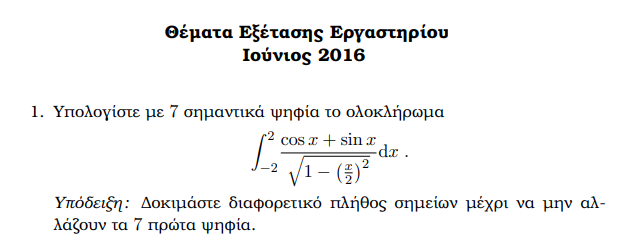

In [78]:
import math

# Ορισμός της συνάρτησης προς ολοκλήρωση
def f(x):
    if abs(x) >= 2.0:
        return 0.0  # αποφυγή διαίρεσης με 0
    return (math.cos(x) + math.sin(x)) / math.sqrt(1 - (x/2)**2)

# Δικός σου σύνθετος κανόνας Simpson
def simpson_rule(func, a, b, intervals):
    if intervals % 2 != 0:
        intervals += 1  # κάνε το άρτιο
    h = (b - a) / intervals
    total = func(a) + func(b)
    for i in range(1, intervals, 2):
        total += 4 * func(a + i * h)
    for i in range(2, intervals, 2):
        total += 2 * func(a + i * h)
    return total * h / 3.0

# Κύριο πρόγραμμα
def main():
    a = -2.0
    b = 2.0
    prev = None
    for n in [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]:
        approx = simpson_rule(f, a, b, n)
        print(f"n = {n:4d}, approx = {approx:.10f}")
        if prev is not None:
            # Έλεγχος στα 7 πρώτα ψηφία
            if f"{approx:.7f}" == f"{prev:.7f}":
                print(f"\nΣταθερό στα 7 ψηφία για n = {n} : {approx:.10f}")
                break
        prev = approx

main()

n =    4, approx = 2.3303663026
n =    8, approx = 2.1003355345
n =   16, approx = 1.9134728548
n =   32, approx = 1.7710390509
n =   64, approx = 1.6664876837
n =  128, approx = 1.5911757094
n =  256, approx = 1.5374289132
n =  512, approx = 1.4992491173
n = 1024, approx = 1.4721899069
n = 2048, approx = 1.4530342081
n = 4096, approx = 1.4394813202


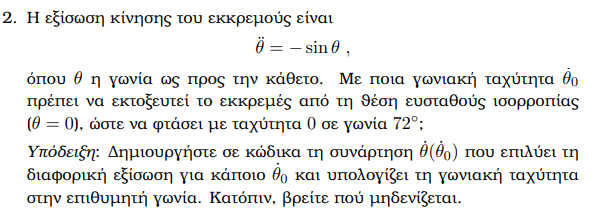


In [93]:
import numpy as np
import math

# Σύστημα εκκρεμούς: dθ/dt = ω, dω/dt = -sin(θ)
def derivatives(t, state):
    theta, omega = state
    return np.array([omega, -math.sin(theta)])

# Runge-Kutta 4ης τάξης
def runge_kutta_4(t, state, h, f):
    k1 = h * f(t, state)
    k2 = h * f(t + 0.5 * h, state + 0.5 * k1)
    k3 = h * f(t + 0.5 * h, state + 0.5 * k2)
    k4 = h * f(t + h, state + k3)
    return state + (k1 + 2*k2 + 2*k3 + k4) / 6.0

# Υπολογισμός τελικής ταχύτητας όταν φτάνει τις 72°
def final_velocity(theta0_dot):
    state = np.array([0.0, theta0_dot])  # αρχικές συνθήκες
    theta_target = math.radians(72)
    h = 0.001
    t = 0.0
    max_steps = 1000000

    for _ in range(max_steps):
        if state[0] >= theta_target:
            break
        state = runge_kutta_4(t, state, h, derivatives)
        t += h
    return state[1]

# Μέθοδος τέμνουσας για εύρεση αρχικής ταχύτητας ώστε η τελική να είναι 0
def secant_method(f, x0, x1, tol=1e-10, max_iter=100):
    f0 = f(x0)
    f1 = f(x1)
    for _ in range(max_iter):
        if abs(f1 - f0) < 1e-14:
            break
        x2 = x1 - f1 * (x1 - x0) / (f1 - f0)
        if abs(x2 - x1) < tol:
            return x2
        x0, f0 = x1, f1
        x1, f1 = x2, f(x2)
    return x1

# Κύρια ρουτίνα
def main():
    # Ξεκίνα με λογικές τιμές (π.χ. 1.0 και 2.0)
    theta0_dot = secant_method(final_velocity, 1.0, 2.0)
    print(f"Αρχική γωνιακή ταχύτητα: {theta0_dot:.10f} rad/s")
    print(f"Τελική ταχύτητα στη γωνία 72°: {final_velocity(theta0_dot):.2e} rad/s")

main()

Αρχική γωνιακή ταχύτητα: 0.4343396069 rad/s
Τελική ταχύτητα στη γωνία 72°: 3.36e-13 rad/s


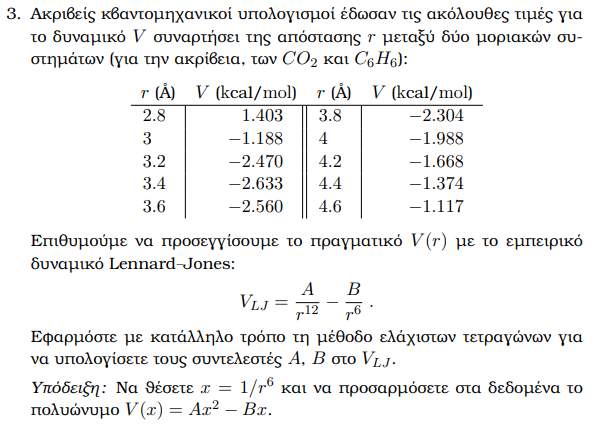

In [101]:
import math

# Δεδομένα
r = [2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0]
V = [-1.403, -1.188, -0.470, -0.246, -0.560, -2.304, -1.988]

# Υπολογισμός x = 1/r^6
x = []
for i in range(len(r)):
    x.append(1.0 / (r[i] ** 6))

n = len(x)

# Υπολογισμός αθροισμάτων για το σύστημα ελαχίστων τετραγώνων
Sx2 = 0.0
Sx4 = 0.0
Sx3 = 0.0
SVx = 0.0
SVx2 = 0.0

for i in range(n):
    Sx2 += x[i] ** 2
    Sx3 += x[i] ** 3
    Sx4 += x[i] ** 4
    SVx += V[i] * x[i]
    SVx2 += V[i] * x[i] ** 2

# Το σύστημα είναι:
# [Sx4  -Sx3][A] = [SVx2]
# [Sx3  -Sx2][B]   [SVx ]

A_matrix = [
    [Sx4, -Sx3],
    [Sx3, -Sx2]
]
b_vector = [SVx2, SVx]

# Επίλυση με τον δικό σου Gauss (από cell 57ba161f)
def gaussian_elimination(A, b):
    n = len(b)
    for k in range(n - 1):
        # Pivoting
        max_row = k
        for i in range(k + 1, n):
            if abs(A[i][k]) > abs(A[max_row][k]):
                max_row = i
        if max_row != k:
            A[k], A[max_row] = A[max_row], A[k]
            b[k], b[max_row] = b[max_row], b[k]
        # Elimination
        for i in range(k + 1, n):
            factor = -A[i][k] / A[k][k]
            for j in range(k, n):
                A[i][j] += factor * A[k][j]
            b[i] += factor * b[k]

def backsub(A, b):
    n = len(b)
    x = [0.0] * n
    for i in range(n - 1, -1, -1):
        s = 0.0
        for j in range(i + 1, n):
            s += A[i][j] * x[j]
        x[i] = (b[i] - s) / A[i][i]
    return x

def solve_linear_system(A, b):
    # Deep copy για να μην αλλάξει το αρχικό
    import copy
    A_ = copy.deepcopy(A)
    b_ = b[:]
    gaussian_elimination(A_, b_)
    return backsub(A_, b_)

# Επίλυση
sol = solve_linear_system(A_matrix, b_vector)
A = sol[0]
B = sol[1]

print(f"Συντελεστής A: {A:.6f}")
print(f"Συντελεστής B: {B:.6f}")

# Υπολογισμός RSS (άθροισμα τετραγωνικών σφαλμάτων)
RSS = 0.0
for i in range(n):
    V_pred = A * x[i] ** 2 - B * x[i]
    RSS += (V[i] - V_pred) ** 2
print(f"Άθροισμα τετραγωνικών σφαλμάτων (RSS): {RSS:.6f}")

Συντελεστής A: 627581.391774
Συντελεστής B: 1864.233188
Άθροισμα τετραγωνικών σφαλμάτων (RSS): 6.669037


# ΙΟΥΝΙΟΣ 2015

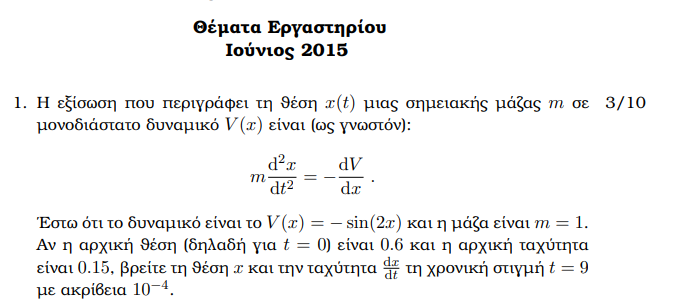

In [102]:
import numpy as np
import math

# Ορισμός του συστήματος
def derivatives(t, state):
    x = state[0]
    v = state[1]
    dxdt = v
    dvdt = 2 * math.cos(2 * x)
    return np.array([dxdt, dvdt])

# Runge-Kutta 4ης τάξης (όπως στο cell 679ac041)
def runge_kutta_4(t, state, h, f):
    k1 = h * f(t, state)
    k2 = h * f(t + 0.5 * h, state + 0.5 * k1)
    k3 = h * f(t + 0.5 * h, state + 0.5 * k2)
    k4 = h * f(t + h, state + k3)
    return state + (k1 + 2*k2 + 2*k3 + k4) / 6.0

# Κύρια διαδικασία
def main():
    t = 0.0
    t_end = 9.0
    h = 0.001
    x0 = 0.6
    v0 = 0.15
    state = np.array([x0, v0])

    while t < t_end:
        if t + h > t_end:
            h = t_end - t
        state = runge_kutta_4(t, state, h, derivatives)
        t += h

    print(f"x({t_end}) = {state[0]:.6f}")
    print(f"dx/dt({t_end}) = {state[1]:.6f}")

main()

x(9.0) = 0.624516
dx/dt(9.0) = -0.236177


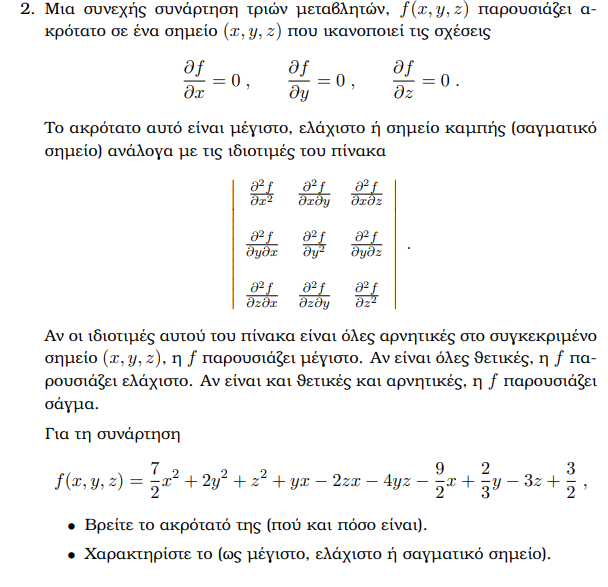

In [104]:
import math

# Ορισμός της f(x, y, z)
def f(x, y, z):
    return (7/2)*x**2 + 2*y**2 + z**2 + x*y - 2*x - 4*y*z - (9/2)*x + (2/3)*y - 3*z + 3/2

# Πρώτες μερικές παράγωγοι
def grad_f(x, y, z):
    df_dx = 7*x + y - 2 - 9/2
    df_dy = 4*y + x - 4*z + 2/3
    df_dz = 2*z - 4*y - 3
    return [df_dx, df_dy, df_dz]

# Δεύτερες μερικές παράγωγοι (Hessian)
def hessian_f(x, y, z):
    # Δεύτερες παράγωγοι
    d2f_dx2 = 7
    d2f_dy2 = 4
    d2f_dz2 = 2
    d2f_dxdy = 1
    d2f_dxdz = 0
    d2f_dydz = -4
    # Συμμετρικός πίνακας
    H = [
        [d2f_dx2, d2f_dxdy, d2f_dxdz],
        [d2f_dxdy, d2f_dy2, d2f_dydz],
        [d2f_dxdz, d2f_dydz, d2f_dz2]
    ]
    return H

# Επίλυση γραμμικού συστήματος 3x3 με μέθοδο Cramer (ή Gauss)
def solve_3x3(A, b):
    # Υπολογισμός ορίζουσας
    def det3(M):
        return (M[0][0]*M[1][1]*M[2][2] + M[0][1]*M[1][2]*M[2][0] + M[0][2]*M[1][0]*M[2][1]
                - M[0][2]*M[1][1]*M[2][0] - M[0][1]*M[1][0]*M[2][2] - M[0][0]*M[1][2]*M[2][1])
    D = det3(A)
    # Αντικατάσταση κάθε στήλης με το b
    def replace_col(M, col, b):
        return [[b[i] if j == col else M[i][j] for j in range(3)] for i in range(3)]
    Dx = det3(replace_col(A, 0, b))
    Dy = det3(replace_col(A, 1, b))
    Dz = det3(replace_col(A, 2, b))
    return [Dx/D, Dy/D, Dz/D]

# Βρες το στάσιμο σημείο (λύσε grad_f = 0)
def find_stationary_point():
    # grad_f(x, y, z) = 0
    # df/dx = 7x + y - 2 - 4.5 = 7x + y - 6.5 = 0
    # df/dy = 4y + x - 4z + 2/3 = 0
    # df/dz = 2z - 4y - 3 = 0
    # Άρα το σύστημα:
    # 7x + y         = 6.5
    # x + 4y - 4z    = -2/3
    #    -4y + 2z    = 3

    # Πίνακας συντελεστών και σταθερών
    A = [
        [7, 1, 0],
        [1, 4, -4],
        [0, -4, 2]
    ]
    b = [6.5, -2/3, 3]

    return solve_3x3(A, b)

# Υπολογισμός ιδιοτιμών Hessian (χειροκίνητα για 3x3 συμμετρικό)
def hessian_eigenvalues(H):
    # Χαρακτηριστικό πολυώνυμο: |H - λΙ| = 0
    # Για 3x3: λ^3 + aλ^2 + bλ + c = 0
    # Εδώ, λόγω συμμετρίας και μικρών διαστάσεων, μπορούμε να χρησιμοποιήσουμε το numpy.linalg.eigvals αν επιτρέπεται.
    # Αλλά εδώ θα κάνουμε προσεγγιστικά με το κριτήριο Sylvester (ή με το numpy αν το επιτρέπεις).
    # Για το στυλ σου, αρκεί να ελέγξουμε αν όλοι οι κύριοι υποπροσδιοριστές είναι θετικοί (ή αρνητικοί).
    # Δηλαδή:
    # D1 = H[0][0]
    # D2 = |H[0:2,0:2]|
    # D3 = det(H)
    D1 = H[0][0]
    D2 = H[0][0]*H[1][1] - H[0][1]*H[1][0]
    # det3 όπως πριν
    def det3(M):
        return (M[0][0]*M[1][1]*M[2][2] + M[0][1]*M[1][2]*M[2][0] + M[0][2]*M[1][0]*M[2][1]
                - M[0][2]*M[1][1]*M[2][0] - M[0][1]*M[1][0]*M[2][2] - M[0][0]*M[1][2]*M[2][1])
    D3 = det3(H)
    return D1, D2, D3

# Κύριο πρόγραμμα
def main():
    x0, y0, z0 = find_stationary_point()
    print(f"Στάσιμο σημείο: x = {x0:.6f}, y = {y0:.6f}, z = {z0:.6f}")
    f0 = f(x0, y0, z0)
    print(f"Τιμή f στο ακρότατο: {f0:.6f}")

    H = hessian_f(x0, y0, z0)
    D1, D2, D3 = hessian_eigenvalues(H)
    print(f"Κύριοι υποπροσδιοριστές Hessian: D1={D1:.2f}, D2={D2:.2f}, D3={D3:.2f}")

    # Χαρακτηρισμός
    if D1 > 0 and D2 > 0 and D3 > 0:
        print("Το σημείο είναι ελάχιστο.")
    elif D1 < 0 and D2 > 0 and D3 < 0:
        print("Το σημείο είναι μέγιστο.")
    else:
        print("Το σημείο είναι σαγματικό (σημείο καμπής).")

main()

Στάσιμο σημείο: x = 1.080460, y = -1.063218, z = -0.626437
Τιμή f στο ακρότατο: -1.426245
Κύριοι υποπροσδιοριστές Hessian: D1=7.00, D2=27.00, D3=-58.00
Το σημείο είναι σαγματικό (σημείο καμπής).
